In [1]:
from google.colab import drive

# Google Drive를 마운트합니다.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 필요한 라이브러리 설치
!pip install pandas scikit-learn matplotlib

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [4]:
# 표현형 데이터 로드
train_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_conti.phe', delim_whitespace=True, header=None)
train_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n300_binary.phe', delim_whitespace=True, header=None)
test_pheno_conti = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_conti.phe', delim_whitespace=True, header=None)
test_pheno_binary = pd.read_csv('/content/drive/MyDrive/data/pheno_n150_binary.phe', delim_whitespace=True, header=None)

# 유전자 데이터 로드
train_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n300_p1000.mldose', delim_whitespace=True, header=None)
test_geno = pd.read_csv('/content/drive/MyDrive/data/sim_n150_p1000.mldose', delim_whitespace=True, header=None)

In [5]:
# 유전자 정보 추출
X_train_conti = train_geno.iloc[:, 2:]
X_test_conti = test_geno.iloc[:, 2:]

X_train_binary = train_geno.iloc[:, 2:]
X_test_binary = test_geno.iloc[:, 2:]

# 연속형 표현형 값 추출
y_train_conti = train_pheno_conti.iloc[:, 2]  # 올바른 열(3번째 컬럼) 선택
y_test_conti = test_pheno_conti.iloc[:, 2]

# 이진형 표현형 값 추출
y_train_binary = train_pheno_binary.iloc[:, 3]
y_test_binary = test_pheno_binary.iloc[:, 3]


In [6]:
#선형회귀 모델 (continuous)
from sklearn.linear_model import LinearRegression

model_conti = LinearRegression()
model_conti.fit(X_train_conti, y_train_conti)

LinearRegression()

Mean Squared Error (Continuous): 1.2363372397496089


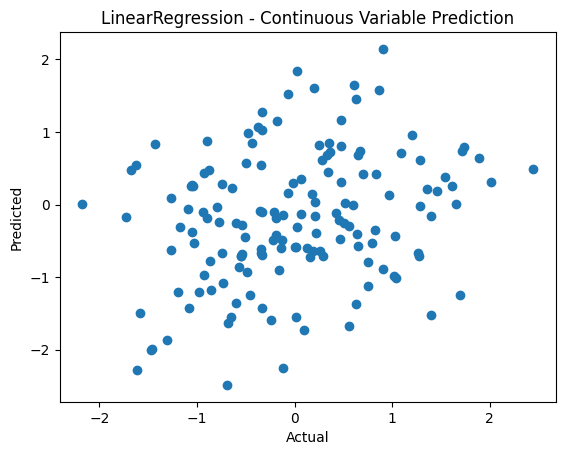

In [21]:
# 예측
y_pred_conti = model_conti.predict(X_test_conti)

# 평가
mse_conti = mean_squared_error(y_test_conti, y_pred_conti)
print(f'Mean Squared Error (Continuous): {mse_conti}')

# 시각화
plt.scatter(y_test_conti, y_pred_conti)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('LinearRegression - Continuous Variable Prediction')
plt.show()

In [11]:
# 로지스틱 회귀 모델 학습 (Binary)
model_binary = LogisticRegression(max_iter=200)
model_binary.fit(X_train_binary, y_train_binary)

LogisticRegression(max_iter=200)

Accuracy (Binary): 0.7866666666666666
AUC (Binary): 0.5272952853598015


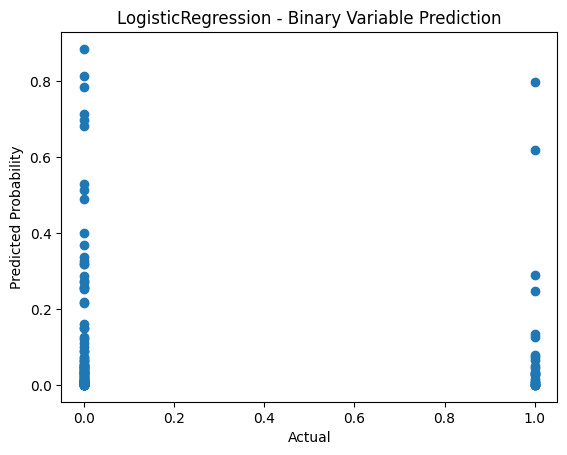

In [22]:
# 예측
y_pred_binary = model_binary.predict(X_test_binary)
y_pred_binary_proba = model_binary.predict_proba(X_test_binary)[:, 1]

# 평가
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)
auc_binary = roc_auc_score(y_test_binary, y_pred_binary_proba)
print(f'Accuracy (Binary): {accuracy_binary}')
print(f'AUC (Binary): {auc_binary}')

# 시각화
plt.scatter(y_test_binary, y_pred_binary_proba)
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')
plt.title('LogisticRegression - Binary Variable Prediction')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
# TensorFlow 관련 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled_conti = scaler.fit_transform(X_train_conti)
X_test_scaled_conti = scaler.transform(X_test_conti)

X_train_scaled_binary = scaler.fit_transform(X_train_binary)
X_test_scaled_binary = scaler.transform(X_test_binary)

Epoch 1/100
8/8 [==============================] - 2s 52ms/step - loss: 1.2977 - val_loss: 1.2088
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.4182 - val_loss: 1.1771
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1386 - val_loss: 1.1347
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0640 - val_loss: 1.1466
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 1.1365
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0152 - val_loss: 1.1020
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0127 - val_loss: 1.1111
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0067 - val_loss: 1.1179
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0030 - val_loss: 1.1095
Epoch 10/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 1.1152
Epoch 11/100
8/8 [=======

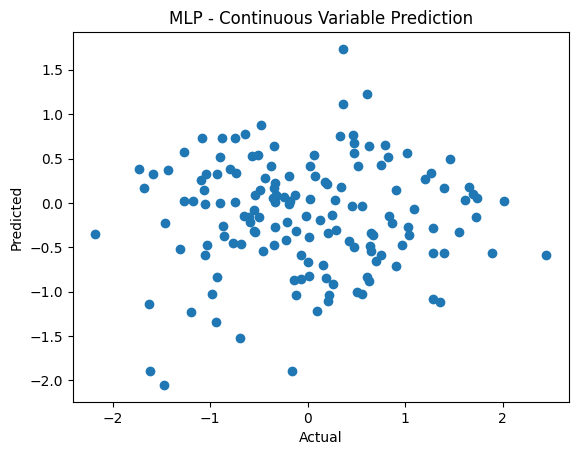

In [15]:
# MLP 모델 정의 및 학습 (Continuous)
model_mlp_conti = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_conti.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_mlp_conti.compile(optimizer='adam', loss='mse')
model_mlp_conti.fit(X_train_scaled_conti, y_train_conti, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 평가
y_pred_mlp_conti = model_mlp_conti.predict(X_test_scaled_conti)
mse_mlp_conti = mean_squared_error(y_test_conti, y_pred_mlp_conti)
print(f'Mean Squared Error (MLP - Continuous): {mse_mlp_conti}')

# MLP Model 시각화 (Continuous)
plt.scatter(y_test_conti, y_pred_mlp_conti)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('MLP - Continuous Variable Prediction')
plt.show()

Epoch 1/100
8/8 [==============================] - 4s 144ms/step - loss: 2.6843 - val_loss: 2.2336
Epoch 2/100
8/8 [==============================] - 0s 50ms/step - loss: 1.2512 - val_loss: 0.8517
Epoch 3/100
8/8 [==============================] - 0s 49ms/step - loss: 0.9360 - val_loss: 0.9761
Epoch 4/100
8/8 [==============================] - 0s 63ms/step - loss: 0.8324 - val_loss: 0.8249
Epoch 5/100
8/8 [==============================] - 1s 63ms/step - loss: 0.6309 - val_loss: 0.8414
Epoch 6/100
8/8 [==============================] - 1s 68ms/step - loss: 0.4995 - val_loss: 0.8776
Epoch 7/100
8/8 [==============================] - 0s 50ms/step - loss: 0.4574 - val_loss: 0.8059
Epoch 8/100
8/8 [==============================] - 0s 51ms/step - loss: 0.3393 - val_loss: 0.8691
Epoch 9/100
8/8 [==============================] - 0s 44ms/step - loss: 0.2744 - val_loss: 0.8209
Epoch 10/100
8/8 [==============================] - 0s 46ms/step - loss: 0.2420 - val_loss: 0.8401
Epoch 11/100
8/8 [

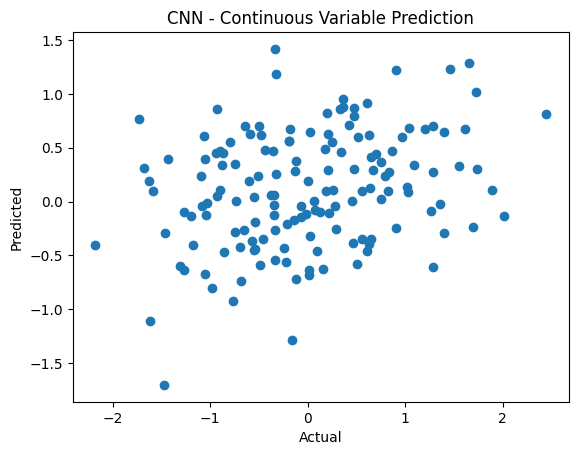

In [16]:
# CNN 모델 정의 및 학습 (Continuous)
X_train_cnn = X_train_scaled_conti.reshape(-1, X_train_scaled_conti.shape[1], 1)
X_test_cnn = X_test_scaled_conti.reshape(-1, X_test_scaled_conti.shape[1], 1)

model_cnn_conti = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])
model_cnn_conti.compile(optimizer='adam', loss='mse')
model_cnn_conti.fit(X_train_cnn, y_train_conti, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 평가
y_pred_cnn_conti = model_cnn_conti.predict(X_test_cnn)
mse_cnn_conti = mean_squared_error(y_test_conti, y_pred_cnn_conti)
print(f'Mean Squared Error (CNN - Continuous): {mse_cnn_conti}')

# CNN Model 시각화 (Continuous)
plt.scatter(y_test_conti, y_pred_cnn_conti)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('CNN - Continuous Variable Prediction')
plt.show()

Epoch 1/100
8/8 [==============================] - 6s 469ms/step - loss: 0.8651 - val_loss: 0.9473
Epoch 2/100
8/8 [==============================] - 5s 646ms/step - loss: 0.8596 - val_loss: 0.9505
Epoch 3/100
8/8 [==============================] - 3s 411ms/step - loss: 0.8589 - val_loss: 0.9495
Epoch 4/100
8/8 [==============================] - 3s 358ms/step - loss: 0.8578 - val_loss: 0.9580
Epoch 5/100
8/8 [==============================] - 3s 340ms/step - loss: 0.8557 - val_loss: 0.9555
Epoch 6/100
8/8 [==============================] - 4s 486ms/step - loss: 0.8550 - val_loss: 0.9600
Epoch 7/100
8/8 [==============================] - 4s 503ms/step - loss: nan - val_loss: nan
Epoch 8/100
8/8 [==============================] - 3s 341ms/step - loss: nan - val_loss: nan
Epoch 9/100
8/8 [==============================] - 3s 340ms/step - loss: nan - val_loss: nan
Epoch 10/100
8/8 [==============================] - 3s 345ms/step - loss: nan - val_loss: nan
Epoch 11/100
5/5 [===============

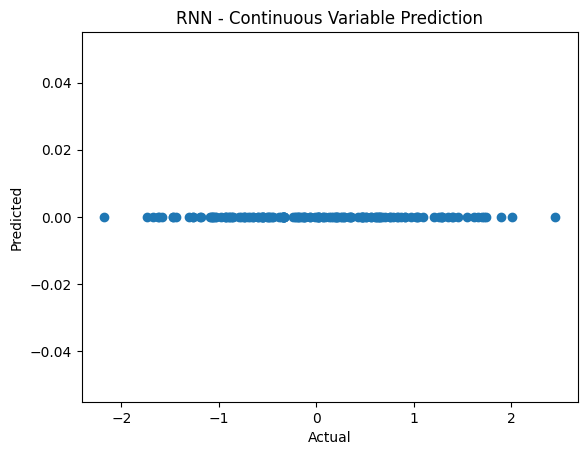

In [17]:
# RNN 모델 정의 및 학습 (Continuous)
model_rnn_conti = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dense(1)
])
model_rnn_conti.compile(optimizer='adam', loss='mse')
model_rnn_conti.fit(X_train_cnn, y_train_conti, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 예측 및 평가
y_pred_rnn_conti = model_rnn_conti.predict(X_test_cnn)

# NaN 값 확인
print(f'Number of NaN values in predictions: {sum(pd.isna(y_pred_rnn_conti).flatten())}')

# NaN 값 제거 (필요 시)
y_pred_rnn_conti = pd.DataFrame(y_pred_rnn_conti).fillna(0).values.flatten()

mse_rnn_conti = mean_squared_error(y_test_conti, y_pred_rnn_conti)
print(f'Mean Squared Error (RNN - Continuous): {mse_rnn_conti}')

# RNN Model 시각화 (Continuous)
plt.scatter(y_test_conti, y_pred_rnn_conti)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RNN - Continuous Variable Prediction')
plt.show()

Epoch 1/100
8/8 [==============================] - 3s 99ms/step - loss: 0.7706 - accuracy: 0.5458 - val_loss: 0.5930 - val_accuracy: 0.6667
Epoch 2/100
8/8 [==============================] - 0s 41ms/step - loss: 0.2676 - accuracy: 0.9208 - val_loss: 0.5188 - val_accuracy: 0.7833
Epoch 3/100
8/8 [==============================] - 0s 33ms/step - loss: 0.1424 - accuracy: 0.9917 - val_loss: 0.5129 - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 0s 21ms/step - loss: 0.0861 - accuracy: 1.0000 - val_loss: 0.5181 - val_accuracy: 0.7833
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 0.0571 - accuracy: 1.0000 - val_loss: 0.5221 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 44ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 0.5250 - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 22ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.5278 - val_accuracy: 0.8000
Epoch 8/100
8/8 [===

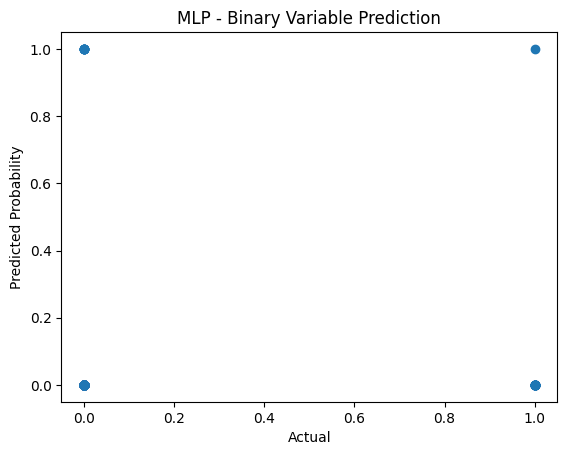

In [18]:
# MLP 모델 정의 및 학습 (Binary)
model_mlp_binary = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled_binary.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_mlp_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_mlp_binary.fit(X_train_scaled_binary, y_train_binary, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 평가
y_pred_mlp_binary = model_mlp_binary.predict(X_test_scaled_binary)
y_pred_mlp_binary = (y_pred_mlp_binary > 0.5).astype(int)
accuracy_mlp_binary = accuracy_score(y_test_binary, y_pred_mlp_binary)
auc_mlp_binary = roc_auc_score(y_test_binary, y_pred_mlp_binary)
print(f'Accuracy (MLP - Binary): {accuracy_mlp_binary}')
print(f'AUC (MLP - Binary): {auc_mlp_binary}')

# MLP Model 시각화 (Binary)
plt.scatter(y_test_binary, y_pred_mlp_binary)
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')
plt.title('MLP - Binary Variable Prediction')
plt.show()

Epoch 1/100
8/8 [==============================] - 4s 157ms/step - loss: 0.9447 - accuracy: 0.6667 - val_loss: 0.9428 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 0s 59ms/step - loss: 0.6004 - accuracy: 0.8125 - val_loss: 0.4991 - val_accuracy: 0.8000
Epoch 3/100
8/8 [==============================] - 0s 52ms/step - loss: 0.3965 - accuracy: 0.8042 - val_loss: 0.5279 - val_accuracy: 0.7500
Epoch 4/100
8/8 [==============================] - 0s 52ms/step - loss: 0.3157 - accuracy: 0.8792 - val_loss: 0.5444 - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 0s 53ms/step - loss: 0.2297 - accuracy: 0.9292 - val_loss: 0.5353 - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 0s 48ms/step - loss: 0.1757 - accuracy: 0.9417 - val_loss: 0.4952 - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 0s 37ms/step - loss: 0.1462 - accuracy: 0.9833 - val_loss: 0.5424 - val_accuracy: 0.8000
Epoch 8/100
8/8 [==

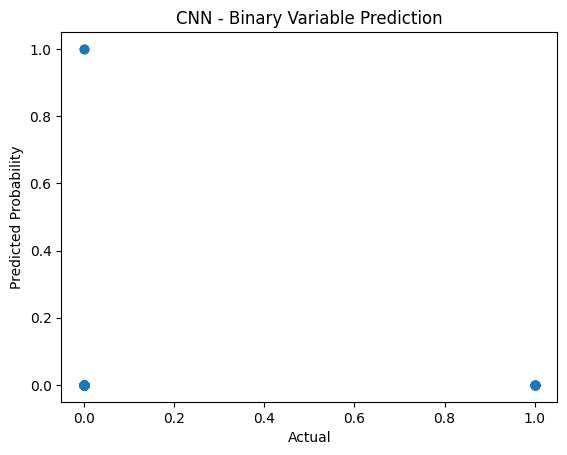

In [19]:
# CNN 모델 정의 및 학습 (Binary)
X_train_cnn_binary = X_train_scaled_binary.reshape(-1, X_train_scaled_binary.shape[1], 1)
X_test_cnn_binary = X_test_scaled_binary.reshape(-1, X_test_scaled_binary.shape[1], 1)

model_cnn_binary = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn_binary.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model_cnn_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_binary.fit(X_train_cnn_binary, y_train_binary, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 평가
y_pred_cnn_binary = model_cnn_binary.predict(X_test_cnn_binary)
y_pred_cnn_binary = (y_pred_cnn_binary > 0.5).astype(int)
accuracy_cnn_binary = accuracy_score(y_test_binary, y_pred_cnn_binary)
auc_cnn_binary = roc_auc_score(y_test_binary, y_pred_cnn_binary)
print(f'Accuracy (CNN - Binary): {accuracy_cnn_binary}')
print(f'AUC (CNN - Binary): {auc_cnn_binary}')

# CNN Model 시각화 (Binary)
plt.scatter(y_test_binary, y_pred_cnn_binary)
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')
plt.title('CNN - Binary Variable Prediction')
plt.show()

Epoch 1/100
8/8 [==============================] - 7s 591ms/step - loss: 0.6886 - accuracy: 0.5708 - val_loss: 0.6625 - val_accuracy: 0.8000
Epoch 2/100
8/8 [==============================] - 3s 349ms/step - loss: 0.6465 - accuracy: 0.8000 - val_loss: 0.6184 - val_accuracy: 0.8000
Epoch 3/100
8/8 [==============================] - 4s 486ms/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 4/100
8/8 [==============================] - 3s 364ms/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 5/100
8/8 [==============================] - 5s 579ms/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 6/100
8/8 [==============================] - 3s 378ms/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 7/100
8/8 [==============================] - 3s 350ms/step - loss: nan - accuracy: 0.8000 - val_loss: nan - val_accuracy: 0.8000
Epoch 8/100
8/8 [==========================

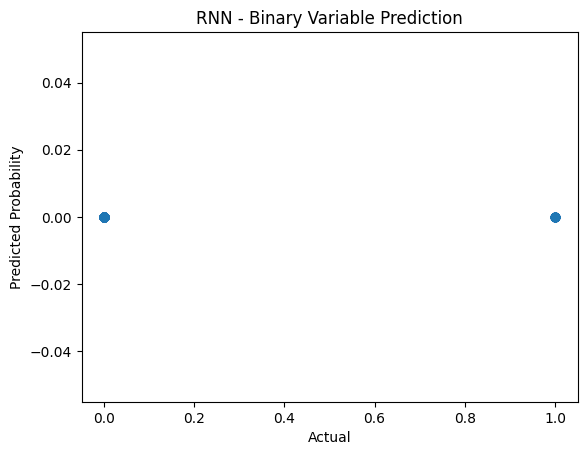

In [20]:
# RNN 모델 정의 및 학습 (Binary)
model_rnn_binary = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_cnn_binary.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model_rnn_binary.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_rnn_binary.fit(X_train_cnn_binary, y_train_binary, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience=10)], verbose=1)

# 평가
y_pred_rnn_binary = model_rnn_binary.predict(X_test_cnn_binary)
y_pred_rnn_binary = (y_pred_rnn_binary > 0.5).astype(int)
accuracy_rnn_binary = accuracy_score(y_test_binary, y_pred_rnn_binary)
auc_rnn_binary = roc_auc_score(y_test_binary, y_pred_rnn_binary)
print(f'Accuracy (RNN - Binary): {accuracy_rnn_binary}')
print(f'AUC (RNN - Binary): {auc_rnn_binary}')

# RNN Model 시각화 (Binary)
plt.scatter(y_test_binary, y_pred_rnn_binary)
plt.xlabel('Actual')
plt.ylabel('Predicted Probability')
plt.title('RNN - Binary Variable Prediction')
plt.show()